<a href="https://colab.research.google.com/github/Chaksome/Machine-Learning-Mnist/blob/main/myPEPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

CPU times: user 2.41 s, sys: 345 ms, total: 2.75 s
Wall time: 2.67 s


CNN-PEPS

In [2]:
dim0 =28;

batch_size = 128
num_classes = 10
epochs = 20
d_bond = 4
def preprocess_images(x):
  n_data, dim0, dim1 = tuple(x.shape)
  n_sites = dim0 * dim1
  x = x/255.0
  xx = tf.cast(tf.math.greater(x, 0.5), dtype=tf.int32)
  y = tf.keras.utils.to_categorical(xx, 2)
  for k in range(len(x)):
      for i in range(len(x[0])):
        for j in range(len(x[0][0])):
           #1
     #       y[k][i] = [np.cos(x[k][i]*np.pi/2)**2, np.sin(x[k][i]*np.pi/2)**2]
           y[k][i][j] = [x[k][i][j], 1-x[k][i][j]]
     #       if x[k][i] <= 0.5 :
      #          y[k][i] = [1, 0]
       #     else:
        #        y[k][i] = [0, 1]
  return y


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#visulization
from scipy.ndimage import interpolation

#抗扭斜函数

def moments(image):#计算图片的矩
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] 
    totalImage = np.sum(image) 
    m0 = np.sum(c0*image)/totalImage 
    m1 = np.sum(c1*image)/totalImage 
    m00 = np.sum((c0-m0)**2*image)/totalImage 
    m11 = np.sum((c1-m1)**2*image)/totalImage 
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage 
    mu_vector = np.array([m0,m1]) 
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) 
    return mu_vector, covariance_matrix

def deskew(image):#根据计算结果旋转图片，抗扭斜
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)))
    return np.array(currents)

x_train = deskewAll(x_train)
x_test = deskewAll(x_test)
mu = 0
sigma = 0.5
#X_train = (X_train+np.random.normal(mu, sigma,size=X_train.shape))%255
#X_test = (X_test+np.random.normal(mu, sigma,size=X_test.shape))%255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#x_train = preprocess_images(x_train)
#x_test = preprocess_images(x_test)

11501568/11490434 [==============================] - 1s 0us/step


PurePEPS

In [3]:
dim0 =28;
def preprocess_images(x):
  n_data, dim0, dim1 = tuple(x.shape)
  n_sites = dim0 * dim1
  x = x/255.0
  xx = tf.cast(tf.math.greater(x, 0.5), dtype=tf.int32)
  y = tf.keras.utils.to_categorical(xx, 2)
  for k in range(len(x)):
      for i in range(len(x[0])):
        for j in range(len(x[0][0])):
           #1
     #       y[k][i] = [np.cos(x[k][i]*np.pi/2)**2, np.sin(x[k][i]*np.pi/2)**2]
           y[k][i][j] = [x[k][i][j], 1-x[k][i][j]]
     #       if x[k][i] <= 0.5 :
      #          y[k][i] = [1, 0]
       #     else:
        #        y[k][i] = [0, 1]
  return y


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

from scipy.ndimage import interpolation

def moments(image):#计算图片的矩
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] 
    totalImage = np.sum(image) 
    m0 = np.sum(c0*image)/totalImage 
    m1 = np.sum(c1*image)/totalImage 
    m00 = np.sum((c0-m0)**2*image)/totalImage 
    m11 = np.sum((c1-m1)**2*image)/totalImage 
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage 
    mu_vector = np.array([m0,m1]) 
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) 
    return mu_vector, covariance_matrix

def deskew(image):#根据计算结果旋转图片，抗扭斜
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)))
    return np.array(currents)

x_train = deskewAll(x_train)
x_test = deskewAll(x_test)
mu = 0
sigma = 0.5
#X_train = (X_train+np.random.normal(mu, sigma,size=X_train.shape))%255
#X_test = (X_test+np.random.normal(mu, sigma,size=X_test.shape))%255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

In [7]:

batch_size = 200
num_classes = 10
epochs = 30
d_bond = 3
dim0 = 28
class PEPSLayer(layers.Layer):

  def __init__(self, dim0, d_bond, n_output, dtype=tf.float32):
    super(PEPSLayer, self).__init__()
    if dim0 % 2:
        raise NotImplementedError("Number of sites should be even but is "
                                  "{}.".format(dim0))

    self.n_half = dim0 // 2
    self.left = tf.Variable(self._initializer(self.n_half,dim0, 2, d_bond),
                            dtype=dtype, trainable=True)
    self.right = tf.Variable(self._initializer(self.n_half,dim0, 2, d_bond),
                             dtype=dtype, trainable=True)
    self.middle = tf.Variable(self._initializermiddle(n_output, dim0,1, d_bond)[0],
                              dtype=dtype, trainable=True)

  @staticmethod
  #初始化四个部分的低阶张量网络
  def _initializer(dim0,dim1, d_phys, d_bond):
    w = np.stack(d_phys * dim0*dim1 * [np.eye(d_bond**2)])
    w = w.reshape((d_phys, dim0, dim1, d_bond, d_bond, d_bond, d_bond))
    return w + np.random.normal(0, 1e-2, size=w.shape)

  @staticmethod
  #初始化中间的核
  def _initializermiddle(dim0,dim1, d_phys, d_bond):
    w = np.stack(d_phys * dim0 * [np.eye(d_bond**4)])
    w = w.reshape((d_phys, dim0, d_bond, d_bond, d_bond, d_bond, d_bond, d_bond, d_bond, d_bond))
    return w + np.random.normal(0, 1e-2, size=w.shape)

  def call(self, inputs):
    num = int(inputs.shape[0]//1)
    leftt = np.stack(num * dim0*dim0//2 * [np.eye(d_bond**2)])
    leftt = leftt.reshape(dim0,dim0//2,num,d_bond,d_bond,d_bond,d_bond)
    rightt = np.stack(num * dim0*dim0//2 * [np.eye(d_bond**2)])
    rightt = rightt.reshape(dim0,dim0//2,num,d_bond,d_bond,d_bond,d_bond)

    aaa = inputs
    for m in range(dim0):
      nowleftt = tf.einsum("slijxy,bls->lbijxy", self.left[:,:,m-1], aaa[:,:self.n_half,m-1])
      nowrightt = tf.einsum("slijxy,bls->lbijxy", self.right[:,:,m-1], aaa[:,self.n_half:,m-1])
      nowlefttt = self.reduction(nowleftt)
      nowrighttt = self.reduction(nowrightt)
      #以下操作用于结合数据以及投影函数
      if m == 0:
        lefttt = nowlefttt
        righttt = nowrighttt
      if m == 1:
        lefttt = tf.stack([lefttt, nowlefttt], axis = 0)
        righttt = tf.stack([righttt, nowrighttt], axis =0)
      if m > 1:
        lefttt = tf.concat([lefttt, tf.stack([nowlefttt],0)], axis = 0)
        righttt = tf.concat([righttt, tf.stack([nowrighttt],0)], axis =0)    

    
    lefttop = lefttt[:dim0//2]
    leftbot = lefttt[dim0//2:]
    rightbot = righttt[dim0//2:]
    righttop = righttt[:dim0//2]

    lefttop = self.reduction(lefttop)#左上部分缩并
    righttop = self.reduction(righttop)#右上部分缩并
    rightbot = self.reduction(rightbot)#左下部分缩并
    leftbot = self.reduction(leftbot)#右下部分缩并
    #同MPS原理相同，只不过此处是左上、左下，右上，右下四个部分与核作内积

    f = tf.einsum("bjwie,bxlif,cefghwxyz,bzlhk,bjygk->bc", lefttop, righttop,self.middle,rightbot,leftbot)#爱因斯坦求和约定求误差决定函数
    return f

  @staticmethod
  def reduction(tensor):
    size = int(tensor.shape[0])
    while size > 1:
      half_size = size // 2
      nice_size = 2 * half_size
      leftover = tensor[nice_size:]
      tensor = tf.matmul(tensor[0:nice_size:2], tensor[1:nice_size:2])
      tensor = tf.concat([tensor, leftover], axis=0)
      size = half_size + int(size % 2 == 1)
    y = tensor[0]
    return y


# Define model
input_shape = (28,28,3)
model = Sequential()

model.add(PEPSLayer(dim0 = dim0, d_bond=d_bond, n_output=num_classes))
model.add(layers.Softmax())


# Compile and run
model.compile(optimizer='Adam',loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[annealer])
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
300/300 [==============================] - 556s 2s/step - loss: 0.6871 - accuracy: 0.7650 - val_loss: 0.2470 - val_accuracy: 0.9236 - lr: 0.0010
Epoch 2/30
300/300 [==============================] - 525s 2s/step - loss: 0.2343 - accuracy: 0.9276 - val_loss: 0.1893 - val_accuracy: 0.9392 - lr: 9.5000e-04
Epoch 3/30
300/300 [==============================] - 526s 2s/step - loss: 0.1902 - accuracy: 0.9421 - val_loss: 0.1596 - val_accuracy: 0.9524 - lr: 9.0250e-04
Epoch 4/30
300/300 [==============================] - 526s 2s/step - loss: 0.1681 - accuracy: 0.9480 - val_loss: 0.1559 - val_accuracy: 0.9533 - lr: 8.5737e-04
Epoch 5/30
300/300 [==============================] - 526s 2s/step - loss: 0.1566 - accuracy: 0.9522 - val_loss: 0.1435 - val_accuracy: 0.9558 - lr: 8.1451e-04
Epoch 6/30
300/300 [==============================] - 526s 2s/step - loss: 0.1460 - accuracy: 0.9544 - val_loss: 0.1747 - val_accuracy: 0.9472 - lr: 7.7378e-04
Epoch 7/30
300/300 [========================

In [6]:


#加载训练好的模型
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive')
model = tf.keras.models.load_model('saved_model/my_pepsmodel')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


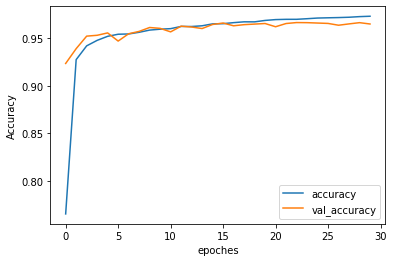

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoches')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')